# What makes people in a country happy?

# Cleaning

## Imports

In [6]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns


## Data Munging

In [7]:
year2015 = pd.read_csv('./data/2015.csv')
year2016 = pd.read_csv('./data/2016.csv')
year2017 = pd.read_csv('./data/2017.csv')
year2018 = pd.read_csv('./data/2018.csv')
year2019 = pd.read_csv('./data/2019.csv')

year2015['year'] = '2015'
year2016['year'] = '2016'
year2017['year'] = '2017'
year2018['year'] = '2018'
year2019['year'] = '2019'
year2019

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,year
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,2019
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,2019
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,2019
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,2019
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,2019
...,...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411,2019
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147,2019
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025,2019
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035,2019


In [8]:
data = pd.concat([year2015, year2016,year2017,year2018,year2019])
data.set_index(data['year'])

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),...,Trust..Government.Corruption.,Dystopia.Residual,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption
year,,,,,,,,,,,,,,,,,,,,,
2015,Switzerland,Western Europe,1.0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015,Iceland,Western Europe,2.0,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015,Denmark,Western Europe,3.0,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015,Norway,Western Europe,4.0,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015,Canada,North America,5.0,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,152.0,Rwanda,3.334,0.359,0.711,0.614,0.555,0.411
2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,153.0,Tanzania,3.231,0.476,0.885,0.499,0.417,0.147
2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,154.0,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.025


In [9]:


df_2015 = pd.read_csv('./data/2015.csv')
df_2016 = pd.read_csv('./data/2016.csv')
df_2017 = pd.read_csv('./data/2017.csv')
df_2018 = pd.read_csv('./data/2018.csv')
def standardize_columns(df, year):
    df.columns = df.columns.str.replace('.', ' ').str.strip()
    df.rename(columns=standard_columns, inplace=True)
    df['Year'] = year 
    return df
standard_columns = {
    'Country or region': 'Country',
    'Overall rank': 'Happiness Rank',
    'Score': 'Happiness Score',
    'Happiness Score': 'Happiness Score',
    'Economy (GDP per Capita)': 'GDP per Capita',
    'Economy  GDP per Capita': 'GDP per Capita',
    'GDP per capita': 'GDP per Capita',
    'Family': 'Social Support',
    'Social support': 'Social Support',
    'Health (Life Expectancy)': 'Healthy Life Expectancy',
    'Health  Life Expectancy': 'Healthy Life Expectancy',
    'Healthy life expectancy': 'Healthy Life Expectancy',
    'Freedom': 'Freedom to Make Life Choices',
    'Freedom to make life choices': 'Freedom to Make Life Choices',
    'Trust (Government Corruption)': 'Perceptions of Corruption',
    'Trust  Government Corruption': 'Perceptions of Corruption',
    'Perceptions of corruption': 'Perceptions of Corruption',
}
df_2015 = standardize_columns(df_2015,2015)
df_2016 = standardize_columns(df_2016,2016)
df_2017 = standardize_columns(df_2017,2017)
df_2018 = standardize_columns(df_2018,2018)
common_cols = ['Country', 'Happiness Rank', 'Happiness Score', 'GDP per Capita', 'Social Support',
               'Healthy Life Expectancy', 'Freedom to Make Life Choices', 'Perceptions of Corruption', 'Generosity', 'Year']
df_2015 = df_2015[common_cols]
df_2016 = df_2016[common_cols]
df_2017 = df_2017[common_cols]
df_2018 = df_2018[common_cols]
df_merged = pd.concat([df_2015, df_2016, df_2017, df_2018], ignore_index=True)
for column in common_cols[1:-1]:
    if df_merged[column].isnull().any():
        df_merged[column].fillna(df_merged[column].mean(), inplace=True)
for column in common_cols[1:]:  
    df_merged[column] = df_merged[column].round(3)
df_merged.to_csv('data/merged.csv', index=False)

,Country,Happiness Rank,Happiness Score,GDP per Capita,Social Support,Healthy Life Expectancy,Freedom to Make Life Choices,Perceptions of Corruption,Generosity,Year
0,Switzerland,1,7.587,1.397,1.350,0.941,0.666,0.420,0.297,2015
1,Iceland,2,7.561,1.302,1.402,0.948,0.629,0.141,0.436,2015
2,Denmark,3,7.527,1.325,1.361,0.875,0.649,0.484,0.341,2015
3,Norway,4,7.522,1.459,1.331,0.885,0.670,0.365,0.347,2015
4,Canada,5,7.427,1.326,1.323,0.906,0.633,0.330,0.458,2015
...,...,...,...,...,...,...,...,...,...,...
621,Yemen,152,3.355,0.442,1.073,0.343,0.244,0.064,0.083,2018
622,Tanzania,153,3.303,0.455,0.991,0.381,0.481,0.097,0.270,2018
623,South Sudan,154,3.254,0.337,0.608,0.177,0.112,0.106,0.224,2018
624,Central African Republic,155,3.083,0.024,0.000,0.010,0.305,0.038,0.218,2018


First we read in the csv for the years of the data that we are gonna use as our training set which is 2015-2018. After we can see that several issues, first is the different naming conventions for each column of the datasets for different years. Mainly the 2017 one has the most since spaces are replaced with . and there are quotes around each title as well. There are also some changes to the other ones like country vs country or region. So to combat all these we take our dataframe and first remove 

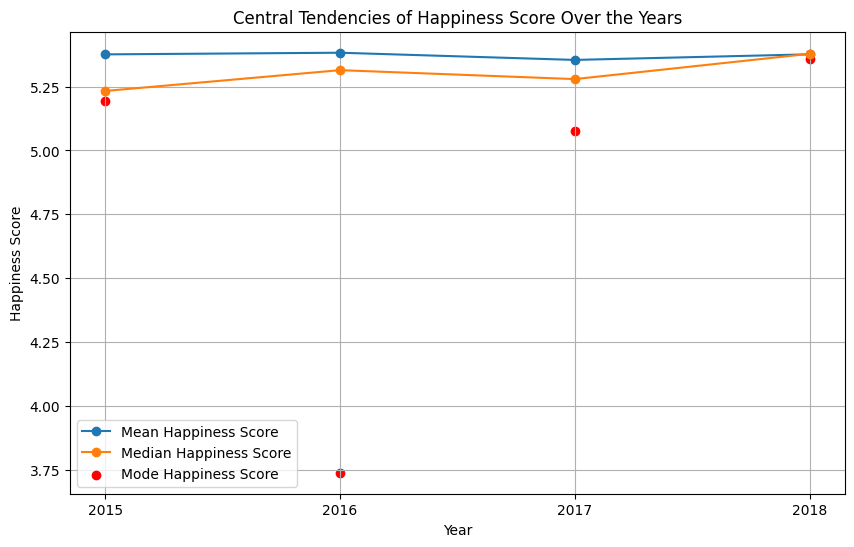

In [10]:
ct = df_merged.groupby('Year')['Happiness Score'].agg(
    mean='mean', 
    median='median', 
    mode=lambda x: x.mode()[0]
)
plt.figure(figsize=(10, 6))
plt.plot(ct.index, ct['mean'], marker='o', label='Mean Happiness Score')
plt.plot(ct.index, ct['median'],  marker='o', label='Median Happiness Score')
plt.scatter(ct.index, ct['mode'], color='red', label='Mode Happiness Score')
plt.xticks(ct.index, labels=[year for year in ct.index])
plt.title('Central Tendencies of Happiness Score Over the Years')
plt.xlabel('Year')
plt.ylabel('Happiness Score')
plt.legend()
plt.grid(True)
plt.show()

Base on graph the central tendencies of happiness over the years, we can see that the mean and median stay close. The mode for 2016 had a firm drop and more variablity which makes sense since it represents the most frequently occuring happiness score. This could mean a more wide spread of data or simply less overlapping scores that year. We also note that there is a general upwards trend with 2018 being a high for most of the datapoints.

In [16]:
rankings_pivot = df_merged.pivot(index='Country', columns='Year', values='Happiness Rank')
ranking_changes = rankings_pivot.diff(axis=1)
stability = ranking_changes.abs().mean(axis=1)
stable_countries = stability[stability < 2].index.tolist()  
average_change = ranking_changes.mean(axis=1)
improved_countries = average_change[average_change < 0].index.tolist()
print("Stable Countries:", stable_countries)
print("Countries that Improved Their Ranking:", improved_countries)

Stable Countries: ['Australia', 'Austria', 'Belgium', 'Belize', 'Burundi', 'Canada', 'Central African Republic', 'Costa Rica', 'Denmark', 'Finland', 'Iceland', 'Iraq', 'Italy', 'Netherlands', 'New Zealand', 'Norway', 'Rwanda', 'Suriname', 'Sweden', 'Switzerland']
Countries that Improved Their Ranking: ['Afghanistan', 'Argentina', 'Austria', 'Bahrain', 'Belgium', 'Belize', 'Benin', 'Bosnia and Herzegovina', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Chad', 'Chile', 'Comoros', 'Congo (Brazzaville)', 'Cyprus', 'Czech Republic', 'Dominican Republic', 'Egypt', 'El Salvador', 'Estonia', 'Finland', 'France', 'Gabon', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Guatemala', 'Guinea', 'Honduras', 'Hungary', 'Iran', 'Ireland', 'Italy', 'Ivory Coast', 'Jamaica', 'Kenya', 'Kosovo', 'Latvia', 'Lebanon', 'Lithuania', 'Macedonia', 'Madagascar', 'Malaysia', 'Mali', 'Malta', 'Mauritius', 'Mongolia', 'Montenegro', 'Morocco', 'Nepal', 'Netherlands', 'New Zealand', 'Nicaragua', 'Niger', 

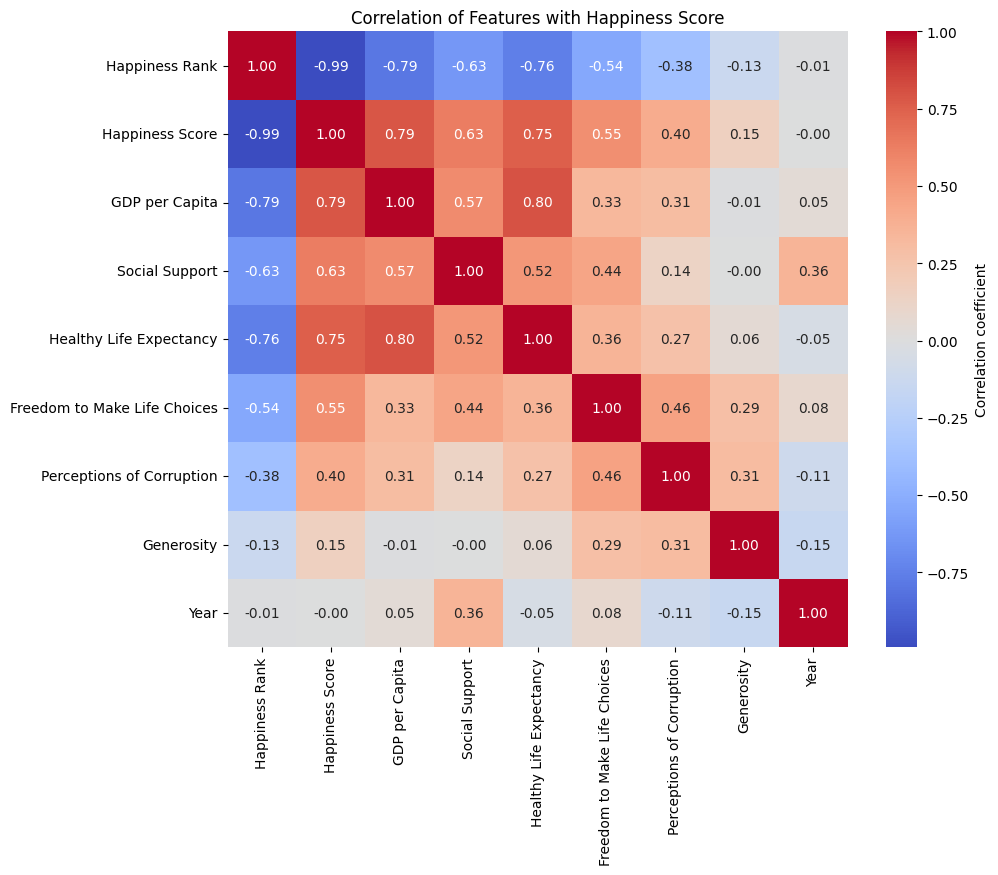

In [18]:
numeric_data = df_merged.select_dtypes(include=[np.number])
correlation_matrix = numeric_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={'label': 'Correlation coefficient'})
plt.title('Correlation of Features with Happiness Score')
plt.show()

Using a heatmap we can view the correlation between every attribute which is helpful in identifying what actually correlate to happiness and other attributes. Taking a look we can see that GDP, Social Support, Life Expectancy, Freedom all have strong correlation with happiness score. This makes sense because those aespects all contribute to a healthy functioning society. If I were the president and provided the data, I would work on social services to provide for citizens since if you take a look at social services it also has strong correlation to the other features of Life Expectancy, Freedom, etc. So building up social services would cause those other attributes to go up as well due to their relation. One thing to note is the almost perfectly negative correlation between happiness ranking and happiness value. This is actually expected since as happiness value goes up the ranking go down since for ranking 1 means high happiness while for value the higher the number the better.